# Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Loading the Dataset

In [3]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_prediction_dataset.csv'

In [6]:
df.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [ ]:
df.smoking_history.replace({
     "No Info":0,
     "never":1,
     "former":2,
     "current":3,
     "not current":4,
     "ever":5
 },inplace=True)

In [8]:
df.gender.replace({
    "Female":0,
    "Male":1,
    "Other":2
},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [ ]:
plt.hist(df["bmi"])

(array([8.6570e+03, 3.1394e+04, 5.0373e+04, 7.3890e+03, 1.7160e+03,
        3.7900e+02, 7.3000e+01, 8.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([10.01 , 18.578, 27.146, 35.714, 44.282, 52.85 , 61.418, 69.986,
        78.554, 87.122, 95.69 ]),
 <BarContainer object of 10 artists>)

# Removing Outliers Using Quantile Method

In [14]:
bmi_min,bmi_max= df.bmi.quantile([0.1,0.85])
df=df[(df.bmi<bmi_max)&(df.bmi>bmi_min)]

In [15]:
bmi_min,bmi_max

(19.18, 32.92)

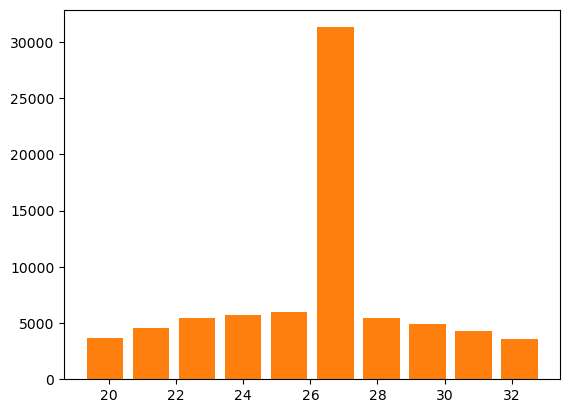

In [19]:
plt.hist(df["bmi"], rwidth=0.8)
plt.show()

In [20]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000,74953.000000
mean,0.418035,44.551577,0.069510,0.040879,1.316091,26.425428,5.505680,137.144144,0.071045
std,0.493591,21.226322,0.254321,0.198011,1.413247,3.035973,1.057838,39.716768,0.256901
min,0.000000,0.080000,0.000000,0.000000,0.000000,19.190000,3.500000,80.000000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,0.000000,24.510000,4.800000,100.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,2.000000,27.320000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,32.910000,9.000000,300.000000,1.000000


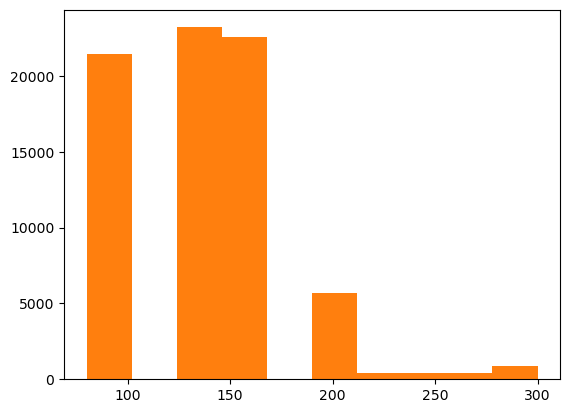

In [22]:
plt.hist(df["blood_glucose_level"])
plt.show()

In [24]:
blood_glucose_level_min,blood_glucose_level_max= df.blood_glucose_level.quantile([0.1,0.9])
df=df[(df.blood_glucose_level>blood_glucose_level_min)&(df.blood_glucose_level<blood_glucose_level_max)]

In [25]:
blood_glucose_level_min,blood_glucose_level_max

(100.0, 160.0)

In [26]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,40031.000000,40031.000000,40031.000000,40031.000000,40031.000000,40031.000000,40031.000000,40031.000000,40031.000000
mean,0.417177,44.278042,0.069096,0.038420,1.312108,26.412277,5.487547,144.508256,0.060578
std,0.493504,21.198876,0.253621,0.192211,1.411849,3.030968,1.047590,12.395843,0.238558
min,0.000000,0.080000,0.000000,0.000000,0.000000,19.190000,3.500000,126.000000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,0.000000,24.500000,4.800000,130.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,27.320000,5.800000,145.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,2.000000,27.320000,6.200000,158.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,32.910000,9.000000,159.000000,1.000000


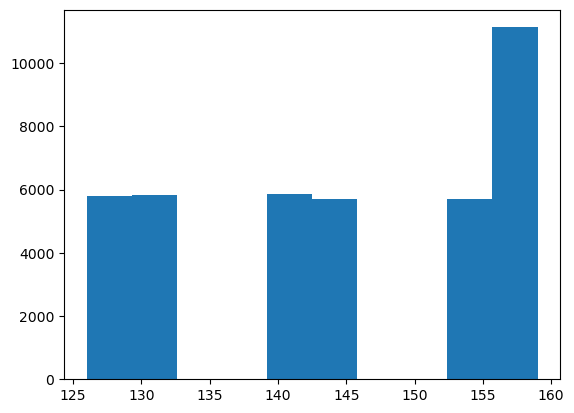

In [27]:
plt.hist(df["blood_glucose_level"])
plt.show()

In [28]:
df["diabetes"].value_counts()

diabetes
0    37606
1     2425
Name: count, dtype: int64

In [29]:
x=df.drop(["diabetes"],axis="columns")
y=df["diabetes"]

# Imbalanced dataset

In [30]:
from imblearn.over_sampling import SMOTE as sm

smote=sm(sampling_strategy="minority")

x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

diabetes
0    37606
1    37606
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2)

# Model Building

In [65]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
model = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
for i in model:
    score =cross_val_score(i,x_train, y_train,cv=10)
    print(i ,score.mean())

LogisticRegression() 0.8312086665352423
DecisionTreeClassifier() 0.9639017658080474
RandomForestClassifier() 0.9629044612958321
GaussianNB() 0.8141069496356069


# Model Evaluation 

In [ ]:
rf_regressor=RandomForestClassifier()
rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test,y_test)


0.9633716678853952

In [67]:
y = rf_regressor.predict(x_test)
print(classification_report(y_test, y))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7478
           1       0.96      0.97      0.96      7565

    accuracy                           0.96     15043
   macro avg       0.96      0.96      0.96     15043
weighted avg       0.96      0.96      0.96     15043



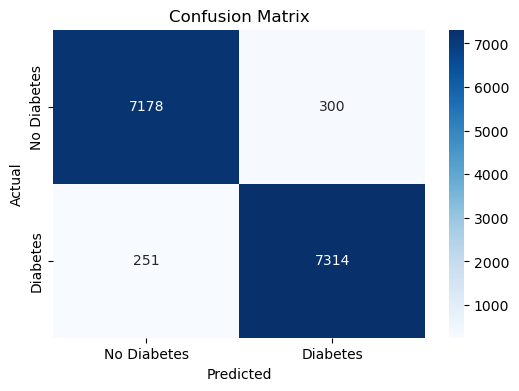

In [68]:



y_pred = rf_regressor.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

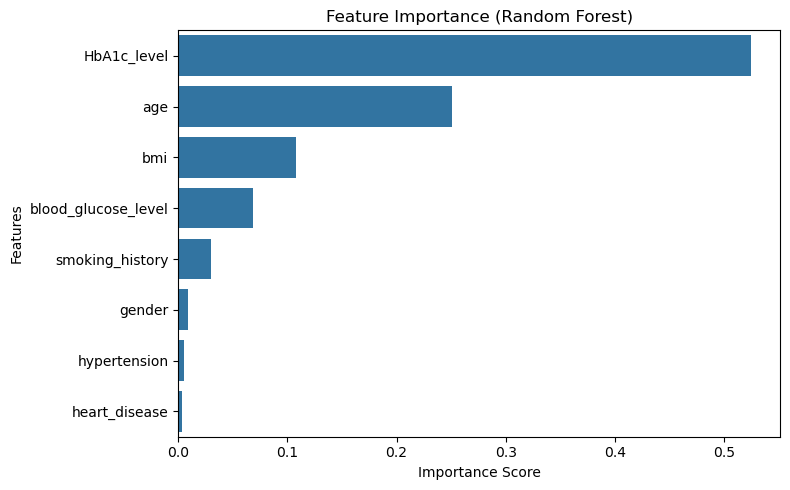

In [69]:
feature_importance = rf_regressor.feature_importances_
features = x.columns if hasattr(x, 'columns') else [f"Feature {i}" for i in range(len(feature_importance))]

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

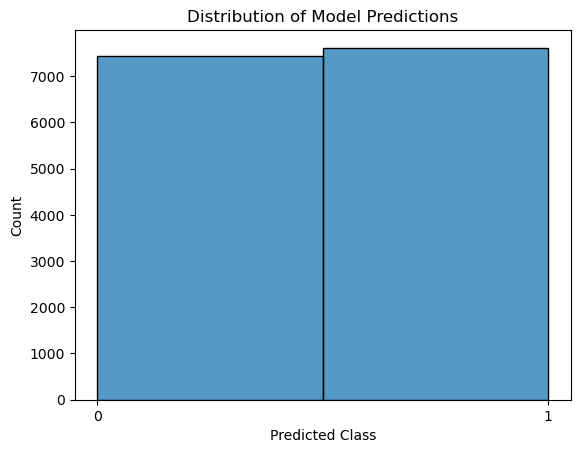

In [70]:
sns.histplot(y_pred, kde=False, bins=2)
plt.xticks([0, 1])
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Distribution of Model Predictions")
plt.show()


In [73]:
import pickle
with open("rf_regressor.pickle","wb") as f:
    pickle.dump(rf_regressor,f)
    print(rf_regressor)

RandomForestClassifier()
